# Exercícios

# Pokemon dataset

dados em `dados/misc/pokemon.csv`

Com o dataset de pokémons das 6 primeiras gerações:

1. **Selecione os 9 tipos mais comuns ('Type 1')**
    - criar um dataframe contendo apenas os 9 tipos mais comuns

2. Existe relação entre Attack e Defense? Mostre com um gráfico.
3. Gere o gráfico do exercício 2 separado para cada um dos 9 tipos. A relação é a mesma?

4. Crie uma coluna "Type 3", onde
    - os tipos Water e Ice passam a ser Water
    - os tipos Rock e Ground passam a ser Rock 
    - os tipos Flying, Fairy e Dragon passam a ser Dragon

5. Qual geração tem mais pokémons? Mostre com um gráfico.
6. **Como o ataque médio se comportou ao longo das gerações? Mostre com um gráfico.**
    - desafio: mostre no mesmo gráfico a tendência para os três tipos mais comuns
7. Mostre com uma visualização o HP médio de cada tipo ('Type 1' ou 'Type 3') de pokemon

8. **Crie uma variável categórica 'Speed2' separando os pokemons entre Slow, Normal e Fast, mantendo as categorias equilibradas**
9. Mostre graficamente que a proporção de Speed2 é aproximadamente homogênea
10. **Mostre a proporção de Slow, Normal e Fast em Speed2 comparando os tipos ('Type 1') Electric e Rock. O que podemos concluir?**
    - obs: você pode fazer dois gráficos, ou um gráfico com dois subplots, utilize o que for mais confortável primeiro

11. **Faça um mapa de calor onde as linhas são tipos ('Type 1'), as colunas são atributos ('HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed') e os valores são a média do atributo para os pokemons de cada tipo.**
    - abaixo um exemplo de como o resultado pode ficar


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1

In [2]:
df = pd.read_csv('../dados/misc/pokemon.csv')
df.head(2)

#       Name Type 1  Type 2  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  \
0  1  Bulbasaur  Grass  Poison    318  45      49       49       65       65   
1  2    Ivysaur  Grass  Poison    405  60      62       63       80       80   

   Speed  Generation  Legendary  
0     45           1      False  
1     60           1      False

In [3]:
count_order = df['Type 1'].value_counts()

In [4]:
count_order.index

Index(['Water', 'Normal', 'Grass', 'Bug', 'Psychic', 'Fire', 'Electric',
       'Rock', 'Dragon', 'Ground', 'Ghost', 'Dark', 'Poison', 'Steel',
       'Fighting', 'Ice', 'Fairy', 'Flying'],
      dtype='object')

In [5]:
toptypes_df = df[df['Type 1'].isin(count_order.head(9).index)]

In [6]:
toptypes_df.shape

(578, 13)

## 6

In [29]:
toptypes_df.head(1)

#       Name Type 1  Type 2  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  \
0  1  Bulbasaur  Grass  Poison    318  45      49       49       65       65   

   Speed  Generation  Legendary  
0     45           1      False

Text(0.5, 1.0, 'Ataque por geração')

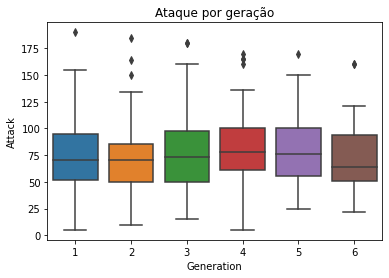

In [31]:
sns.boxplot(x='Generation', y='Attack', data=toptypes_df)
plt.title('Ataque por geração')

In [72]:
toptypes_df.groupby(['Generation', 'Type 1']).agg(
    ataque_medio = ('Attack', np.mean),
    ataque_std   = ('Attack', np.std),
    defesa_media = ('Defense', np.mean),
).reset_index()[['Type 1', 'ataque_medio']]

Type 1  ataque_medio
0        Bug     76.428571
1     Dragon     94.000000
2   Electric     62.000000
3       Fire     88.642857
4      Grass     72.923077
5     Normal     70.625000
6    Psychic     79.181818
7       Rock     87.500000
8      Water     74.193548
9        Bug     85.416667
10  Electric     64.714286
11      Fire     76.250000
12     Grass     57.000000
13    Normal     63.133333
14   Psychic     69.285714
15      Rock    109.200000
16     Water     68.111111
17       Bug     55.833333
18    Dragon    113.333333
19  Electric     57.000000
20      Fire     98.750000
21     Grass     77.923077
22    Normal     69.888889
23   Psychic     70.666667
24      Rock     79.625000
25     Water     80.666667
26       Bug     62.600000
27    Dragon    115.000000
28  Electric     73.583333
29      Fire     85.000000
30     Grass     84.000000
31    Normal     83.055556
32   Psychic     90.000000
33      Rock     86.500000
34     Water     72.461538
35       Bug     77.611111
36    Dragon    129.000000
37  Electric     88.750000
38      Fire     87.444444
39     Grass     65.333333
40    Normal     83.315789
41   Psychic     52.500000
42      Rock    116.000000
43     Water     73.277778
44       Bug     36.333333
45    Dragon     81.250000
46  Electric     50.333333
47      Fire     69.375000
48     Grass     82.200000
49    Normal     55.500000
50   Psychic     82.800000
51      Rock     90.333333
52     Water     68.000000

In [83]:
g = toptypes_df.groupby(['Generation', 'Type 1']).agg(
    ataque_medio = ('Attack', np.mean),
    ataque_std   = ('Attack', np.std),
    defesa_media = ('Defense', np.mean),
).reset_index()[['Generation', 'Type 1', 'ataque_medio']]
g.pivot(index='Generation', columns='Type 1')

ataque_medio                                               \
Type 1              Bug      Dragon   Electric       Fire      Grass   
Generation                                                             
1             76.428571   94.000000  62.000000  88.642857  72.923077   
2             85.416667         NaN  64.714286  76.250000  57.000000   
3             55.833333  113.333333  57.000000  98.750000  77.923077   
4             62.600000  115.000000  73.583333  85.000000  84.000000   
5             77.611111  129.000000  88.750000  87.444444  65.333333   
6             36.333333   81.250000  50.333333  69.375000  82.200000   

                                                         
Type 1         Normal    Psychic        Rock      Water  
Generation                                               
1           70.625000  79.181818   87.500000  74.193548  
2           63.133333  69.285714  109.200000  68.111111  
3           69.888889  70.666667   79.625000  80.666667  
4           83.055556  90.000000   86.500000  72.461538  
5           83.315789  52.500000  116.000000  73.277778  
6           55.500000  82.800000   90.333333  68.000000

In [78]:
df[ ['Type 1', 'Generation'] ]

Type 1  Generation
0      Grass           1
1      Grass           1
2      Grass           1
3      Grass           1
4       Fire           1
..       ...         ...
795     Rock           6
796     Rock           6
797  Psychic           6
798  Psychic           6
799     Fire           6

[800 rows x 2 columns]

In [66]:
toptypes_df.groupby('Generation')[ ['Attack', 'Defense'] ].agg(['sum', 'mean'])

Attack            Defense           
              sum       mean     sum       mean
Generation                                     
1            9840  76.279070    9237  71.604651
2            5805  71.666667    5794  71.530864
3            9039  78.600000    7810  67.913043
4            7330  80.549451    6901  75.835165
5            9368  80.758621    8355  72.025862
6            3340  72.608696    3272  71.130435

In [52]:
mean_gen = toptypes_df.groupby('Generation')['Attack'].mean()

Text(0, 0.5, 'Mean Attack')

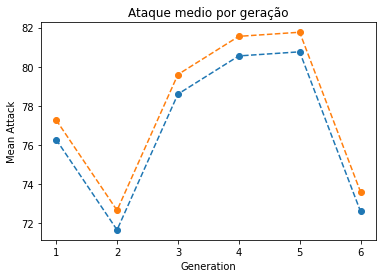

In [67]:
plt.plot(mean_gen, 'o--')
plt.title('Ataque medio por geração')
plt.xlabel('Generation')
plt.ylabel('Mean Attack')

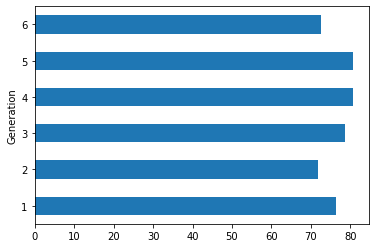

In [51]:
mean_gen.plot.barh()

## 8. Crie uma variável categórica 'Speed2' separando os pokemons entre Slow, Normal e Fast, mantendo as categorias equilibradas

In [85]:
toptypes_df.head()

#                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False

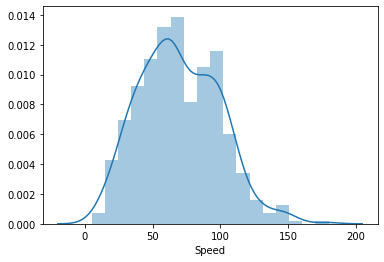

In [91]:
sns.distplot(toptypes_df['Speed'])

In [93]:
toptypes_df['Speed'].describe()

count    578.000000
mean      69.795848
std       29.671100
min        5.000000
25%       48.000000
50%       67.500000
75%       90.750000
max      180.000000
Name: Speed, dtype: float64

In [90]:
pd.cut(
    toptypes_df['Speed'], bins=3,
    #labels=['Slow', 'Normal', 'Fast']
).value_counts()

(63.333, 121.667]    301
(4.825, 63.333]      255
(121.667, 180.0]      22
Name: Speed, dtype: int64

In [94]:
pd.qcut(
    toptypes_df['Speed'], q=3, 
    #labels=['Slow', 'Normal', 'Fast']
).value_counts()

(4.999, 55.0]    203
(55.0, 85.0]     201
(85.0, 180.0]    174
Name: Speed, dtype: int64

In [102]:
df = pd.read_csv('../dados/misc/pokemon.csv')
toptypes_df = df[df['Type 1'].isin(count_order.head(9).index)].copy()

In [103]:
toptypes_df['Speed2'] = pd.qcut(
    toptypes_df['Speed'], q=3, labels=['Slow', 'Normal', 'Fast']
)

In [99]:
toptypes_df.head()

#                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  Speed2  
0       65       65     45           1      False    Slow  
1       80       80     60           1      False  Normal  
2      100      100     80           1      False  Normal  
3      122      120     80           1      False  Normal  
4       60       50     65           1      False  Normal

In [116]:
# df = pd.read_csv('../dados/misc/pokemon.csv')
# toptypes_df = df[df['Type 1'].isin(count_order.head(9).index)]
# toptypes_df.loc[:,'Speed2'] = pd.qcut(
#     toptypes_df['Speed'], q=3, labels=['Slow', 'Normal', 'Fast']
# )

In [117]:
df.head(2)

#       Name Type 1  Type 2  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  \
0  1  Bulbasaur  Grass  Poison    318  45      49       49       65       65   
1  2    Ivysaur  Grass  Poison    405  60      62       63       80       80   

   Speed  Generation  Legendary  
0     45           1      False  
1     60           1      False

In [118]:
toptypes_df.head(2)

#       Name Type 1  Type 2  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  \
0  1  Bulbasaur  Grass  Poison    318  45      49       49       65       65   
1  2    Ivysaur  Grass  Poison    405  60      62       63       80       80   

   Speed  Generation  Legendary  Speed2  
0     45           1      False    Slow  
1     60           1      False  Normal

## 10. Mostre a proporção de Slow, Normal e Fast em Speed2 comparando os tipos ('Type 1') Electric e Rock. O que podemos concluir?

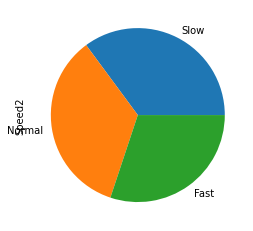

In [124]:
toptypes_df.Speed2.value_counts().plot.pie()

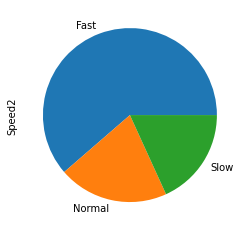

In [132]:
toptypes_df.query(" `Type 1` == 'Electric' ").Speed2.value_counts().plot.pie()
plt.show()

In [139]:
toptypes_df[toptypes_df['Type 1'] == 'Electric'].head()

#       Name    Type 1 Type 2  Total  HP  Attack  Defense  Sp. Atk  \
30    25    Pikachu  Electric    NaN    320  35      55       40       50   
31    26     Raichu  Electric    NaN    485  60      90       55       90   
88    81  Magnemite  Electric  Steel    325  25      35       70       95   
89    82   Magneton  Electric  Steel    465  50      60       95      120   
108  100    Voltorb  Electric    NaN    330  40      30       50       55   

     Sp. Def  Speed  Generation  Legendary  Speed2  
30        50     90           1      False    Fast  
31        80    110           1      False    Fast  
88        55     45           1      False    Slow  
89        70     70           1      False  Normal  
108       55    100           1      False    Fast

In [137]:
toptypes_df.query(" `Generation` == 1 ")

#                   Name   Type 1    Type 2  Total   HP  Attack  \
0      1              Bulbasaur    Grass    Poison    318   45      49   
1      2                Ivysaur    Grass    Poison    405   60      62   
2      3               Venusaur    Grass    Poison    525   80      82   
3      3  VenusaurMega Venusaur    Grass    Poison    625   80     100   
4      4             Charmander     Fire       NaN    309   39      52   
..   ...                    ...      ...       ...    ...  ...     ...   
161  149              Dragonite   Dragon    Flying    600   91     134   
162  150                 Mewtwo  Psychic       NaN    680  106     110   
163  150    MewtwoMega Mewtwo X  Psychic  Fighting    780  106     190   
164  150    MewtwoMega Mewtwo Y  Psychic       NaN    780  106     150   
165  151                    Mew  Psychic       NaN    600  100     100   

     Defense  Sp. Atk  Sp. Def  Speed  Generation  Legendary  Speed2  
0         49       65       65     45           1      False    Slow  
1         63       80       80     60           1      False  Normal  
2         83      100      100     80           1      False  Normal  
3        123      122      120     80           1      False  Normal  
4         43       60       50     65           1      False  Normal  
..       ...      ...      ...    ...         ...        ...     ...  
161       95      100      100     80           1      False  Normal  
162       90      154       90    130           1       True    Fast  
163      100      154      100    130           1       True    Fast  
164       70      194      120    140           1       True    Fast  
165      100      100      100    100           1      False    Fast  

[129 rows x 14 columns]

![](./poke_heatmap.png)

11. **Faça um mapa de calor onde as linhas são tipos ('Type 1'), as colunas são atributos ('HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed') e os valores são a média do atributo para os pokemons de cada tipo.**

In [ ]:
#sns.heatmap()

In [10]:
temp = toptypes_df[[
    'Type 1', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'
]].copy()

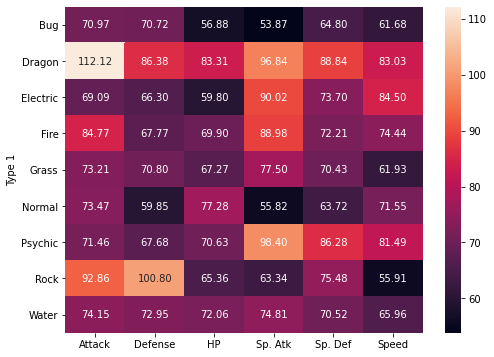

In [24]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    temp.pivot_table(index='Type 1', aggfunc='mean'),
    annot=True, fmt='.2f'
)

In [27]:
temp.pivot_table(index='Type 1', aggfunc='mean')

Attack     Defense         HP    Sp. Atk    Sp. Def      Speed
Type 1                                                                      
Bug        70.971014   70.724638  56.884058  53.869565  64.797101  61.681159
Dragon    112.125000   86.375000  83.312500  96.843750  88.843750  83.031250
Electric   69.090909   66.295455  59.795455  90.022727  73.704545  84.500000
Fire       84.769231   67.769231  69.903846  88.980769  72.211538  74.442308
Grass      73.214286   70.800000  67.271429  77.500000  70.428571  61.928571
Normal     73.469388   59.846939  77.275510  55.816327  63.724490  71.551020
Psychic    71.456140   67.684211  70.631579  98.403509  86.280702  81.491228
Rock       92.863636  100.795455  65.363636  63.340909  75.477273  55.909091
Water      74.151786   72.946429  72.062500  74.812500  70.517857  65.964286

In [26]:
temp.groupby('Type 1').agg('mean')

HP      Attack     Defense    Sp. Atk    Sp. Def      Speed
Type 1                                                                      
Bug       56.884058   70.971014   70.724638  53.869565  64.797101  61.681159
Dragon    83.312500  112.125000   86.375000  96.843750  88.843750  83.031250
Electric  59.795455   69.090909   66.295455  90.022727  73.704545  84.500000
Fire      69.903846   84.769231   67.769231  88.980769  72.211538  74.442308
Grass     67.271429   73.214286   70.800000  77.500000  70.428571  61.928571
Normal    77.275510   73.469388   59.846939  55.816327  63.724490  71.551020
Psychic   70.631579   71.456140   67.684211  98.403509  86.280702  81.491228
Rock      65.363636   92.863636  100.795455  63.340909  75.477273  55.909091
Water     72.062500   74.151786   72.946429  74.812500  70.517857  65.964286

In [14]:
#temp.melt(id_vars='Type 1')

Type 1 variable  value
0       Grass       HP     45
1       Grass       HP     60
2       Grass       HP     80
3       Grass       HP     80
4        Fire       HP     39
...       ...      ...    ...
3463     Rock    Speed     50
3464     Rock    Speed    110
3465  Psychic    Speed     70
3466  Psychic    Speed     80
3467     Fire    Speed     70

[3468 rows x 3 columns]